In [1]:
import os
import numpy as np
import pandas as pd
import time
import warnings
from matplotlib import pyplot as plt

from sklearn.neural_network import MLPClassifier
import sklearn.metrics
from sklearn.metrics import balanced_accuracy_score

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### Data Preprocessing

Contents of train_x.csv: arr of shape (2102, 784)
Contents of valid_x.csv: arr of shape (600, 784)


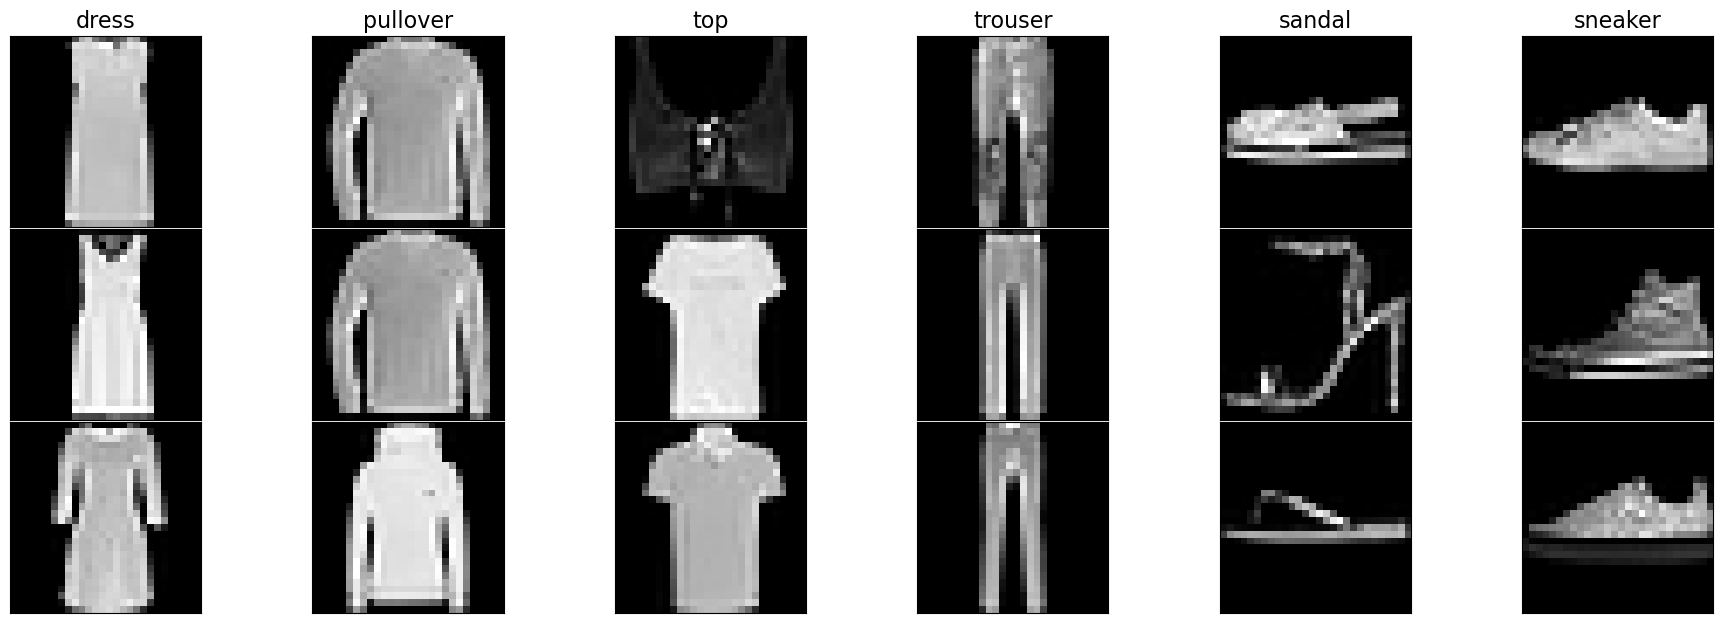

In [2]:
%run load_and_plot_data.py

In [3]:
train_y = np.array(train_y_df['class_uid'])
train_y.shape

(2102,)

In [4]:
train_x.shape, train_x[0].dtype

((2102, 784), dtype('int64'))

### Data Duplication

In [5]:
# selecting the tops and trousers
top_x = train_x[train_y == 0]
trouser_x = train_x[train_y == 1]
top_y = train_y[train_y == 0]
trouser_y = train_y[train_y == 1]

print(top_x.shape, trouser_x.shape)
print(top_y.shape, trouser_y.shape)

(1, 784) (1, 784)
(1,) (1,)


In [6]:
# selecting the dresses
dress_x = train_x[train_y == 3]
dress_y = train_y[train_y == 3]

In [7]:
# selecting pullovers
pullover_x = train_x[train_y == 2]
pullover_y = train_y[train_y == 2]

#### duplicating tops/trousers

In [8]:
# duplicated top and trouser arrays
top_x_array = np.tile(top_x, (1499, 1))
trouser_x_array = np.tile(trouser_x, (1199, 1))

top_y_array = np.tile(top_y, (1499))
trouser_y_array = np.tile(trouser_y, (1199))

print(top_x_array.shape, trouser_x_array.shape)
print(top_y_array.shape, trouser_y_array.shape)

(1499, 784) (1199, 784)
(1499,) (1199,)


#### Randomly Duplicating

In [9]:
#randomly duplicating dresses
dress_dupe_in = np.random.choice(len(dress_x), size = 400, replace = True)
#print(dress_duplicates_in)
dress_dupe_x = dress_x[dress_dupe_in]
dress_dupe_y = dress_y[dress_dupe_in]
#count = np.unique(dress_duplicates_x, return_counts = True)
#count

In [10]:
#randomly duplicating pullovers 
pull_dupe_in = np.random.choice(len(pullover_x), size = 700, replace = True)
#print(dress_duplicates_in)
pull_dupe_x = pullover_x[pull_dupe_in]
pull_dupe_y = pullover_y[pull_dupe_in]
#count = np.unique(dress_duplicates_x, return_counts = True)
#count
# dress_dupe_x.shape# 

In [11]:
## Add tops
tempx = np.vstack((train_x, top_x_array))
print(tempx.shape)
tempy = np.hstack((train_y, top_y_array))

(3601, 784)


In [12]:
## Add Trousers
tempx = np.vstack((tempx, trouser_x_array))
print(tempx.shape)
tempy = np.hstack((tempy, trouser_y_array))

(4800, 784)


In [13]:
## Add Pullovers
tempx = np.vstack((tempx, pull_dupe_x))
print(tempx.shape)
tempy = np.hstack((tempy, pull_dupe_y))

(5500, 784)


In [14]:
## Add dresses
tempx = np.vstack((tempx, dress_dupe_x))
print(tempx.shape)
tempy = np.hstack((tempy, dress_dupe_y))

(5900, 784)


In [15]:
## Adding tops, trousers, and dresses to train_x
print(train_x.shape)
duplicated_train_x = tempx
duplicated_train_y = tempy
print(duplicated_train_x.shape, duplicated_train_y.shape)

(2102, 784)
(5900, 784) (5900,)


In [16]:
valid_y = np.array(valid_y_df['class_uid'])
valid_y.shape, duplicated_train_y.shape

((600,), (5900,))

In [17]:
### Normalizing data

scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(duplicated_train_x)
normed_train_x = scaler.transform(duplicated_train_x)
normed_valid_x = scaler.transform(valid_x)
normed_train_x.shape

(5900, 784)

In [18]:
mlp = MLPClassifier(
            activation='relu',
            solver='lbfgs',
            batch_size = 10000,
            learning_rate='adaptive', 
            early_stopping = True,
            momentum=0.0
            )

### Best hyperparameters to get balanced accuracy on validation/test

Manual best parameter setting

In [22]:
man_params = {'alpha': 100,
              'hidden_layer_sizes': (50,),
              # 'learning_rate_init': 0.001,
              'max_iter': 15,
              'n_iter_no_change': 25,
              'random_state': 111}

In [19]:
# man_params = {'alpha': 100,
#               'hidden_layer_sizes': (128,),
#               'max_iter': 15,
#               'n_iter_no_change': 10,
#               'random_state': 139}

In [23]:
## Manual fit
best_mlp = mlp
best_mlp.set_params(**man_params)
best_mlp.fit(normed_train_x, duplicated_train_y)

C:\Your\Root\Prefix\envs\cs135_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=100, batch_size=10000, early_stopping=True,
              hidden_layer_sizes=(50,), learning_rate='adaptive', max_iter=15,
              momentum=0.0, n_iter_no_change=25, random_state=111,
              solver='lbfgs')

In [24]:
#normed_valid_x = sklearn.preprocessing.normalize(valid_x, norm = 'max', axis = 1)
pred_y = best_mlp.predict(normed_valid_x)
best_mlp_BAcc = balanced_accuracy_score(valid_y, pred_y)
best_mlp_BAcc

0.8666666666666667

### Confusion Matrix

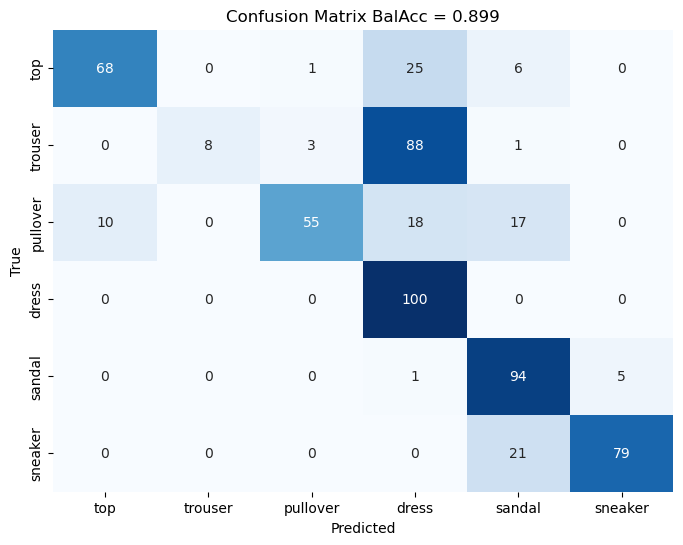

In [109]:
conf_matrix = confusion_matrix(valid_y, pred_y)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['top', 'trouser', 'pullover', 'dress', 'sandal', 'sneaker'],
            yticklabels=['top', 'trouser', 'pullover', 'dress', 'sandal', 'sneaker'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix BalAcc = 0.899')
plt.show()

In [26]:
test = best_mlp.predict(normed_train_x)
balanced_accuracy_score(duplicated_train_y, test)

0.94875

### Leaderboard

In [ ]:
# Load the dataset of interest
datadir = os.path.abspath('data_fashion')
x_NF = np.loadtxt(os.path.join(datadir, 'x_test.csv'), 
                  delimiter=',', 
                  skiprows=1)

N = x_NF.shape[0]

In [ ]:
normed_test_x = scaler.transform(x_NF)

In [ ]:
yhat_pred_num = best_mlp.predict(normed_test_x)

In [ ]:
yhat_pred_num

In [ ]:
yhat_pred = yhat_pred_num.astype(str)
yhat_pred

In [ ]:
names = ['dress', 'pullover', 'top', 'trouser', 'sandal', 'sneaker']


In [ ]:
yhat_pred[yhat_pred_num == 3] = names[0] # dress
yhat_pred[yhat_pred_num == 2] = names[1] # pullover
yhat_pred[yhat_pred_num == 0] = names[2] # top
yhat_pred[yhat_pred_num == 1] = names[3] # trouser
yhat_pred[yhat_pred_num == 5] = names[4] # sandal
yhat_pred[yhat_pred_num == 7] = names[5] # sneaker

yhat_pred

In [ ]:
np.savetxt('yhat_test.txt', yhat_pred, delimiter='\n', fmt='%s')